# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Patrik Kurniawan Saputra
- **Email:** m239b4ky3481@bangkit.academy
- **ID Dicoding:** patrik_saputraa

In [59]:
# from google.colab import drive
# drive.mount('/content/drive')

## Menentukan Pertanyaan Bisnis

- Apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan?
- Bagaimana kondisi cuaca (musim, temp, kelembapan dan angin) memengaruhi jumlah total penyewaan sepeda per jam?
- Jam berapa biasanya terjadinya peak peminjaman?


## Import Semua Packages/Library yang Digunakan

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Kita gunakan numpy dan pandas untuk membantu kita memanipulasi data. Kemudian matplotlib dan seaborn akan digunakan untuk visualisasi data.

## Data Wrangling

### Gathering Data

Melakukan pengumpulan dataset yang tersedia dan mengenali konteks data tersebut. Di sini terdapat 2 data yaitu "hour.csv" yang berisi data peminjaman sepeda berdasarkan jam dan "day.csv" yang berdasarkan hari.

In [61]:
# GATHERING DATA TABEL PEMINJAMAN SEPEDA PER JAM
# Load tabel hour
hour_df = pd.read_csv("https://raw.githubusercontent.com/patrikkurniawansaputra/Proyek-Analisis-Data/refs/heads/main/hour.csv")
hour_df.head() # cek dan tampilkan data


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [62]:
# GATHERING DATA TABEL PEMINJAMAN SEPEDA PER HARI
# Load tabel day
day_df = pd.read_csv("https://raw.githubusercontent.com/patrikkurniawansaputra/Proyek-Analisis-Data/refs/heads/main/day.csv")
day_df.head() # cek dan tampilkan data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kedua tabel berhasil dibaca dan memiliki field yang sama kecuali "hr" yang hanya ada pada "hour.csv"
- Dari dataset tersebut variabel independennya berisi informasi tentang kondisi lingkungan dan musim.

### Assessing Data

Proses assessment ini akan menilai kualitas dari seluruh data yang akan kita gunakan sehingga kita dapat mengetahui permasalahan yang ada di dataset Bike Sharing.

In [63]:
# ================================================== HOUR.CSV ==================================================
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Terdapat kesalahan pada tipe data dteday yang seharusnya berupa datetime namun disitu masih berupa object
- Tidak ada missing value sehingga tidak dilakukan analisis lanjutan untuk missing value

In [64]:
# Melihat deskripsi kuantitatif hour.csv
print("Jumlah data terduplikasi 'hour.csv': ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah data terduplikasi 'hour.csv':  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada rentang nilai yang kemungkinan menjadi outlier
- Tidak ada data yang terduplikasi

In [65]:
# ================================================== DAY.CSV ==================================================
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Terdapat kesalahan pada tipe data dteday yang seharusnya berupa datetime namun disitu masih berupa object
- Tidak ada missing value sehingga tidak dilakukan analisis lanjutan untuk missing value

In [66]:
# Melihat deskripsi kuantitatif day.csv
print("Jumlah data terduplikasi 'day.csv': ", day_df.duplicated().sum())
day_df.describe()

Jumlah data terduplikasi 'day.csv':  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada rentang nilai yang kemungkinan menjadi outlier
- Tidak ada data yang terduplikasi

### Cleaning Data

Proses pembersihan data akan dilakukan pada kedua data, yaitu hour.csv dan day.csv. Keduanya memiliki permasalahan yang sama yaitu kesalahan tipe data pada kolom "dteday" yang bertipe object. Oleh karena itu harus kita ubah menjadi datetime dengan bantuan Pandas.

In [67]:
# ===================== CLEANING DATA HOUR.CSV =====================
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [68]:
# ===================== CLEANING DATA DAY.CSV =====================
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Permasalahan kesalahan tipe data dteday berhasil diubah ke datetime

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [69]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Explore Data day_df

In [70]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Rerata pengguna biasa 848,18 sedangkan pengguna terdaftar 3.656,17. Baik dalam jangka per jam atau per hari rasio perbandingannya sama. Hal ini bisa menjadi perhatian karena >20% pengguna masih belum terdaftar yang bisa kita konversikan menjadi member/registered.

## Merge hour.csv dan day.csv
Keduanya merupakan data yg serupa hanya ada perbedaan pada periode waktu. Sehinga kita gabungkan dengan menyesuaikan data per jam sehingga kita bisa mengetahui tanggal berapa dan jam berapa.

In [71]:
main_df = day_df.merge(hour_df, on='dteday', how='inner', suffixes=('_perhari', '_perjam'))
main_df.to_csv("main_data.csv", index=False)
main_df.head()

,instant_perhari,dteday,season_perhari,yr_perhari,mnth_perhari,holiday_perhari,weekday_perhari,workingday_perhari,weathersit_perhari,temp_perhari,...,weekday_perjam,workingday_perjam,weathersit_perjam,temp_perjam,atemp_perjam,hum_perjam,windspeed_perjam,casual_perjam,registered_perjam,cnt_perjam
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [72]:
# Melihat berdasarkan season dan workingday
main_df.groupby(by=["season_perjam", "workingday_perjam"]).agg({
    "cnt_perjam": "sum"
})

cnt_perjam
season_perjam workingday_perjam            
1             0                      137683
              1                      333665
2             0                      287976
              1                      630613
3             0                      312056
              1                      749073
4             0                      262554
              1                      579059

**Insight:**
- Di setiap musim, ketika hari kerja (workingday) peminjam sepeda jauh lebih banyak dibandingkan saat akhir pekan

In [73]:
# Melihat frekuensi peminjaman berdasarkan kondisi cuaca
byweather_df = main_df.groupby(by=["weathersit_perjam"]).agg({
    "cnt_perjam": "sum",
    "temp_perjam": ["mean"],
    "hum_perjam": ["mean"],
    "windspeed_perjam": ["mean"]
}).reset_index()
byweather_df.columns = ['weathersit_perjam', 'Total Peminjaman', 'Rerata Suhu', 'Rerata Kelembapan', 'Rerata Kecepatan Angin']
print(byweather_df)

   weathersit_perjam  Total Peminjaman  Rerata Suhu  Rerata Kelembapan  \
0                  1           2338173     0.511054           0.573747   
1                  2            795952     0.474445           0.698807   
2                  3            158331     0.456688           0.827632   
3                  4               223     0.186667           0.883333   

   Rerata Kecepatan Angin  
0                0.190553  
1                0.179973  
2                0.218825  
3                0.204000  


**Insight:**
- Peminjaman sepeda paling banyak ada pada saat cuaca cerah berawan di mana temperatur rerata lebih tinggi, tingkat kelembapan rerata lebih rendah dan kecepatan angin rerata cenderung sedang dari musim yang lain

In [74]:
# Melihat frekuensi peminjaman tiap jam
freq_hour_df = main_df.groupby(by=["hr"]).agg({
    "cnt_perjam": "sum"
}).reset_index()
print(freq_hour_df)

    hr  cnt_perjam
0    0       39130
1    1       24164
2    2       16352
3    3        8174
4    4        4428
5    5       14261
6    6       55132
7    7      154171
8    8      261001
9    9      159438
10  10      126257
11  11      151320
12  12      184414
13  13      184919
14  14      175652
15  15      183149
16  16      227748
17  17      336860
18  18      309772
19  19      226789
20  20      164550
21  21      125445
22  22       95612
23  23       63941


**Insight:**
- Terjadi lonjakan peminjaman yang cukup signifikan ketika memasuki jam berangkat kerja (7-9) dan juga jam pulang kerja (16-20)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan?

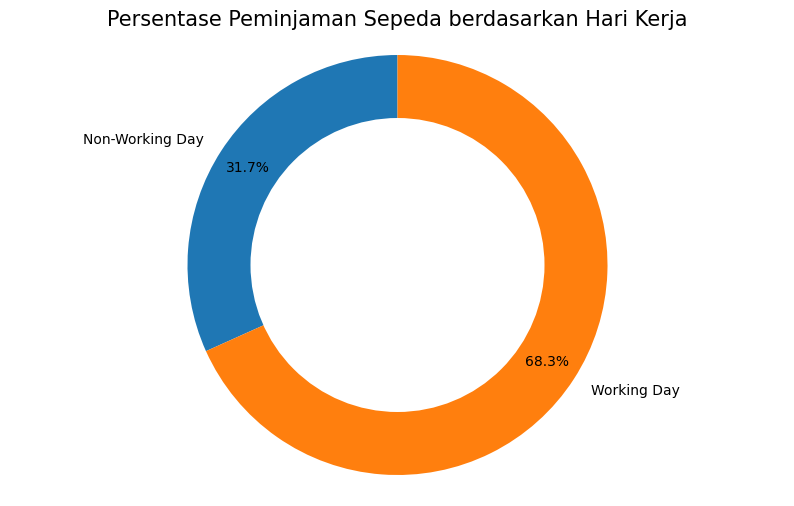

In [75]:
byworkday_df = main_df.groupby(by="workingday_perjam").instant_perjam.nunique().reset_index()
byworkday_df['workingday_perjam'] = byworkday_df['workingday_perjam'].replace({1: 'Working Day', 0: 'Non-Working Day'}) # Rename valuenya agar mudah dibaca
# print(byworkday_df)
total_peminjaman = byworkday_df['instant_perjam'].values
labels = byworkday_df['workingday_perjam'].values

plt.figure(figsize=(10, 6))
plt.pie(total_peminjaman, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Persentase Peminjaman Sepeda berdasarkan Hari Kerja", fontsize=15)
plt.axis('equal')
plt.show()

**Insight:**
- Ketika working day peminjaman sepeda lebih banyak ketika hari libur atau non-working day.

### Pertanyaan 2: Bagaimana kondisi cuaca memengaruhi jumlah total penyewaan sepeda per jam?

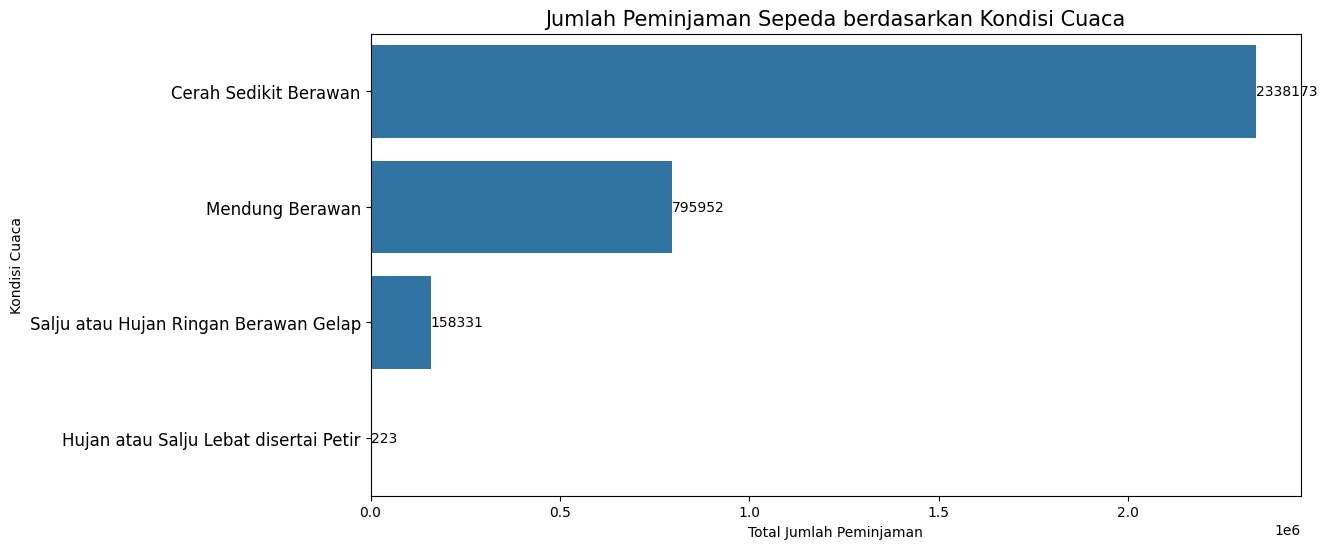

In [76]:
byweather_df['weathersit_perjam'] = byweather_df['weathersit_perjam'].replace({1: 'Cerah Sedikit Berawan', 2: 'Mendung Berawan', 3: 'Salju atau Hujan Ringan Berawan Gelap', 4: 'Hujan atau Salju Lebat disertai Petir'}) # Rename valuenya agar mudah dibaca
# print(byweather_df)
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Total Peminjaman",
    y="weathersit_perjam",
    data=byweather_df.sort_values(by="Total Peminjaman", ascending=False)
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title("Jumlah Peminjaman Sepeda berdasarkan Kondisi Cuaca", loc="center", fontsize=15)
plt.xlabel("Total Jumlah Peminjaman")
plt.ylabel("Kondisi Cuaca")
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Peminjaman paling banyak ada pada saat cuaca cerah sedikit berawan.

### Pertanyaan 3: Jam berapa biasanya terjadinya peak peminjaman?

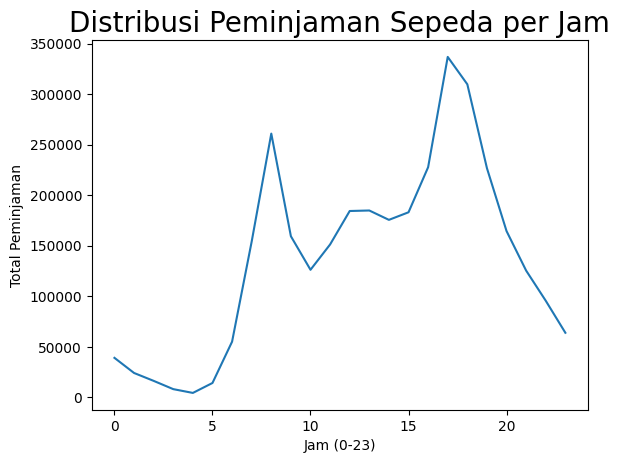

In [77]:
#print(freq_hour_df.columns)
plt.plot(freq_hour_df["hr"], freq_hour_df["cnt_perjam"])
plt.title("Distribusi Peminjaman Sepeda per Jam", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Jam (0-23)")
plt.ylabel("Total Peminjaman")
plt.show()

**Insight:**
- Frekuensi peminjaman meningkat drastis pada rentang jam 7 hingga 9 pagi yang kemudian akan terjadi peningkatan kembali pada jam 4 hingga 7 malam.

## Analisis Lanjutan (Opsional)

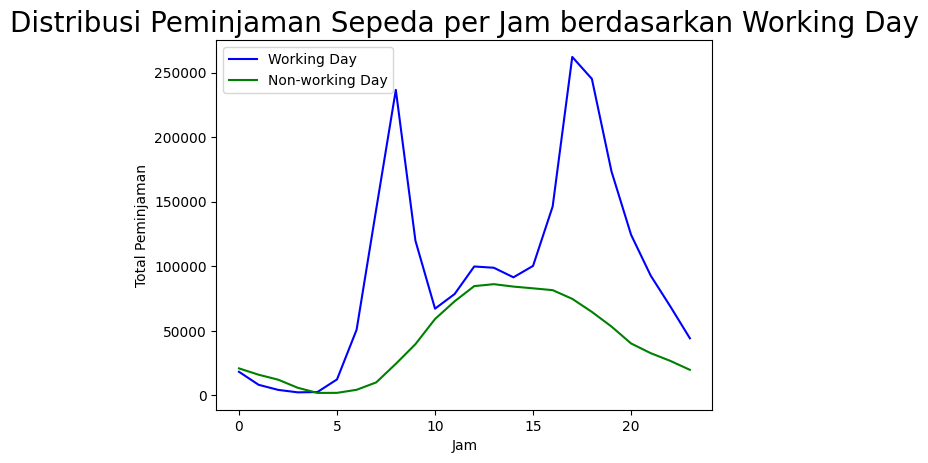

In [78]:
freq_hour_workingday_df = main_df.groupby(by=["hr", "workingday_perjam"]).agg({
    "cnt_perjam": "sum"
}).reset_index()

work_day = freq_hour_workingday_df[freq_hour_workingday_df["workingday_perjam"] == 1]
nonwork_day = freq_hour_workingday_df[freq_hour_workingday_df["workingday_perjam"] == 0]

plt.plot(work_day["hr"], work_day["cnt_perjam"], label="Working Day", color='blue')
plt.plot(nonwork_day["hr"], nonwork_day["cnt_perjam"], label="Non-working Day", color='green')

plt.title("Distribusi Peminjaman Sepeda per Jam berdasarkan Working Day", loc="center", fontsize=20)
plt.xlabel("Jam")
plt.ylabel("Total Peminjaman")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

plt.show()

**Insight:**
- Peningkatan pada analisis sebelumnya ternyata hanya berlaku ketika working day, ketika hari libur frekuensinya tidak setinggi saat hari kerja. Frekuensi peminjaman saat hari libur akan cenderung naik pada jam 10 pagi hingga 7 malam.

## Conclusion

1. Peminjaman sepeda akan lebih banyak saat hari kerja dibandingkan saat hari libur. Hal ini dikarenakan terjadinya lonjakan pada saat jam berangkat dan pulang kerja.
2. Kondisi cuaca berpengaruh terhadap jumlah peminjaman sepeda, saat cuaca cerah berawan dengan temperatur rerata lebih tinggi, tingkat kelembapan rerata lebih rendah dan kecepatan angin rerata cenderung sedang dari musim yang lain.
3. Secara keseluruhan, peningkatan jumlah peminjaman sepeda akan meningkat pada pukul 07.00-09.00 dan 16.00-20.00.